In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Data preparation

In [2]:
a=pd.read_csv("telecom_churn_data.csv")
a.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
a.shape

(99999, 226)

In [4]:
a.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
a.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

- Delete missing value columns more than 30 percent and unwanted columns and "circle_id" columns as it has no unique value.

In [6]:
null_value_col=a.isnull().sum()/99999*100
null_value_30_col=null_value_col[null_value_col.values>30]
null_value_30_col_name=null_value_30_col.index
null_value_30_col_name=list(null_value_30_col_name)
a.drop(null_value_30_col_name,axis=1,inplace=True)
print(a.shape)
unwanted_columns=['circle_id','last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
a.drop(unwanted_columns,axis=1,inplace=True)
print(a.shape)

(99999, 186)
(99999, 177)


In [7]:
a.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,...,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,...,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,7001625959,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,...,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,7001204172,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,...,0,0,0,0,0,2491,0.0,0.0,0.00,0.00
4,7000142493,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,...,0,0,0,0,0,1526,0.0,0.0,0.00,0.00


In [8]:
#Sum and average up total for 6 and 7 month

In [9]:
a['avg_rech_amt_6_7'] = (a['total_rech_amt_6'] + a['total_rech_amt_7'])/2

In [10]:
X = a['avg_rech_amt_6_7'].quantile(0.7)
X

368.5

In [11]:
a = a[a['avg_rech_amt_6_7'] >= X]
a.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [12]:
a.shape

(30011, 178)

In [13]:
#handling missing value in row

In [14]:
a.isnull().sum(axis=1)

7        29
8         0
13        0
16        0
17        0
         ..
99970     0
99974     0
99986     0
99988     0
99997     0
Length: 30011, dtype: int64

In [15]:
null_value_row=a.isnull().sum(axis=1)/178*100
null_value_50_row=null_value_row[null_value_row.values>50]
a.drop(null_value_50_row.index,axis=0,inplace=True)
a.shape

(29897, 178)

In [16]:
#checking and dropping values in columns

In [17]:
a_missing_col = (round(((a.isnull().sum()/len(a.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
a_missing_col.head()

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32


In [18]:
print(((a_missing_col[a_missing_col['null'] == 5.32]).index).to_list())

['loc_ic_mou_9', 'og_others_9', 'loc_og_t2t_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'std_ic_t2t_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'isd_ic_mou_9', 'loc_ic_t2f_mou_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'roam_ic_mou_9']


In [19]:
col_09=a[(a['loc_og_t2m_mou_9'].isnull()) & (a['loc_ic_t2f_mou_9'].isnull()) & (a['roam_og_mou_9'].isnull()) & (a['std_ic_t2m_mou_9'].isnull()) &
  (a['loc_og_t2t_mou_9'].isnull()) & (a['std_ic_t2t_mou_9'].isnull()) & (a['loc_og_t2f_mou_9'].isnull()) & (a['loc_ic_mou_9'].isnull()) &
  (a['loc_og_t2c_mou_9'].isnull()) & (a['loc_og_mou_9'].isnull()) & (a['std_og_t2t_mou_9'].isnull()) & (a['roam_ic_mou_9'].isnull()) &
  (a['loc_ic_t2m_mou_9'].isnull()) & (a['std_og_t2m_mou_9'].isnull()) & (a['loc_ic_t2t_mou_9'].isnull()) & (a['std_og_t2f_mou_9'].isnull()) & 
  (a['std_og_t2c_mou_9'].isnull()) & (a['og_others_9'].isnull()) & (a['std_og_mou_9'].isnull()) & (a['spl_og_mou_9'].isnull()) & 
  (a['std_ic_t2f_mou_9'].isnull()) & (a['isd_og_mou_9'].isnull()) & (a['std_ic_mou_9'].isnull()) & (a['offnet_mou_9'].isnull()) & 
  (a['isd_ic_mou_9'].isnull()) & (a['ic_others_9'].isnull()) & (a['std_ic_t2o_mou_9'].isnull()) & (a['onnet_mou_9'].isnull()) & 
  (a['spl_ic_mou_9'].isnull())]

In [20]:
col_09.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,...,0,0,0,0,502,0.00,0.00,0.00,0.0,380.0
111,7001300706,0.0,0.0,0.0,596.301,146.073,0.000,0.0,55.19,3.26,...,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
143,7000106299,0.0,0.0,0.0,695.609,39.981,0.000,0.0,1325.91,28.61,...,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0
188,7000340381,0.0,0.0,0.0,734.641,183.668,0.000,0.0,4.38,0.98,...,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0


In [21]:
a.drop(col_09.index,inplace=True)
a.shape

(28307, 178)

In [22]:
a_missing_col = (round(((a.isnull().sum()/len(a.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
a_missing_col.head()

,null
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55


In [23]:
print(((a_missing_col[a_missing_col['null'] == 0.55]).index).to_list())

['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8']


In [24]:
col_08=a[(a['loc_og_t2m_mou_8'].isnull()) & (a['loc_ic_t2f_mou_8'].isnull()) & (a['roam_og_mou_8'].isnull()) & (a['std_ic_t2m_mou_8'].isnull()) &
  (a['loc_og_t2t_mou_8'].isnull()) & (a['std_ic_t2t_mou_8'].isnull()) & (a['loc_og_t2f_mou_8'].isnull()) & (a['loc_ic_mou_8'].isnull()) &
  (a['loc_og_t2c_mou_8'].isnull()) & (a['loc_og_mou_8'].isnull()) & (a['std_og_t2t_mou_8'].isnull()) & (a['roam_ic_mou_8'].isnull()) &
  (a['loc_ic_t2m_mou_8'].isnull()) & (a['std_og_t2m_mou_8'].isnull()) & (a['loc_ic_t2t_mou_8'].isnull()) & (a['std_og_t2f_mou_8'].isnull()) & 
  (a['std_og_t2c_mou_8'].isnull()) & (a['og_others_8'].isnull()) & (a['std_og_mou_8'].isnull()) & (a['spl_og_mou_8'].isnull()) & 
  (a['std_ic_t2f_mou_8'].isnull()) & (a['isd_og_mou_8'].isnull()) & (a['std_ic_mou_8'].isnull()) & (a['offnet_mou_8'].isnull()) & 
  (a['isd_ic_mou_8'].isnull()) & (a['ic_others_8'].isnull()) & (a['std_ic_t2o_mou_8'].isnull()) & (a['onnet_mou_8'].isnull()) & 
  (a['spl_ic_mou_8'].isnull())]

In [25]:
col_08.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,...,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,...,0,0,0,0,274,0.0,0.0,0.0,0.0,468.5
788,7000636808,0.0,0.0,0.0,532.742,546.756,0.0,269.274,1173.39,891.83,...,0,0,0,0,936,0.0,0.0,0.0,0.0,604.0
1802,7000516213,0.0,0.0,0.0,810.455,0.000,0.0,0.000,91.33,NaN,...,0,0,0,0,755,0.0,0.0,0.0,0.0,477.5
4837,7002192662,0.0,0.0,0.0,649.150,149.572,0.0,0.250,1354.24,85.13,...,0,0,0,0,520,0.0,0.0,0.0,0.0,421.0


In [26]:
a.drop(col_08.index,inplace=True)
a.shape

(28150, 178)

In [27]:
a_missing_col = (round(((a.isnull().sum()/len(a.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
a_missing_col.head()

,null
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44


In [28]:
col_06=a[(a['loc_og_t2m_mou_6'].isnull()) & (a['loc_ic_t2f_mou_6'].isnull()) & (a['roam_og_mou_6'].isnull()) & (a['std_ic_t2m_mou_6'].isnull()) &
  (a['loc_og_t2t_mou_6'].isnull()) & (a['std_ic_t2t_mou_6'].isnull()) & (a['loc_og_t2f_mou_6'].isnull()) & (a['loc_ic_mou_6'].isnull()) &
  (a['loc_og_t2c_mou_6'].isnull()) & (a['loc_og_mou_6'].isnull()) & (a['std_og_t2t_mou_6'].isnull()) & (a['roam_ic_mou_6'].isnull()) &
  (a['loc_ic_t2m_mou_6'].isnull()) & (a['std_og_t2m_mou_6'].isnull()) & (a['loc_ic_t2t_mou_6'].isnull()) & (a['std_og_t2f_mou_6'].isnull()) & 
  (a['std_og_t2c_mou_6'].isnull()) & (a['og_others_6'].isnull()) & (a['std_og_mou_6'].isnull()) & (a['spl_og_mou_6'].isnull()) & 
  (a['std_ic_t2f_mou_6'].isnull()) & (a['isd_og_mou_6'].isnull()) & (a['std_ic_mou_6'].isnull()) & (a['offnet_mou_6'].isnull()) & 
  (a['isd_ic_mou_6'].isnull()) & (a['ic_others_6'].isnull()) & (a['std_ic_t2o_mou_6'].isnull()) & (a['onnet_mou_6'].isnull()) & 
  (a['spl_ic_mou_6'].isnull())]

In [29]:
col_06.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,...,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,...,0,0,1,0,424,0.00,0.00,0.00,0.00,485.0
423,7000635248,0.0,0.0,0.0,213.802,304.194,149.710,329.643,NaN,0.00,...,0,0,0,0,945,73.55,266.94,63.04,0.00,421.5
934,7002152278,0.0,0.0,0.0,48.000,764.152,500.030,194.400,NaN,14.24,...,0,0,2,1,490,188.83,215.00,0.00,24.18,651.0
1187,7000486275,0.0,0.0,0.0,0.000,757.170,995.719,0.000,NaN,1366.71,...,0,0,0,0,737,0.00,0.00,0.00,0.00,441.5


In [30]:
a.drop(col_06.index,inplace=True)
a.shape

(28026, 178)

In [31]:
a_missing_col = (round(((a.isnull().sum()/len(a.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
a_missing_col.head()

,null
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12


In [32]:
col_07=a[((a['loc_og_t2m_mou_7'].isnull()) & (a['loc_ic_t2f_mou_7'].isnull()) & (a['roam_og_mou_7'].isnull()) & (a['std_ic_t2m_mou_7'].isnull()) &
  (a['loc_og_t2t_mou_7'].isnull()) & (a['std_ic_t2t_mou_7'].isnull()) & (a['loc_og_t2f_mou_7'].isnull()) & (a['loc_ic_mou_7'].isnull()) &
  (a['loc_og_t2c_mou_7'].isnull()) & (a['loc_og_mou_7'].isnull()) & (a['std_og_t2t_mou_7'].isnull()) & (a['roam_ic_mou_7'].isnull()) &
  (a['loc_ic_t2m_mou_7'].isnull()) & (a['std_og_t2m_mou_7'].isnull()) & (a['loc_ic_t2t_mou_7'].isnull()) & (a['std_og_t2f_mou_7'].isnull()) & 
  (a['std_og_t2c_mou_7'].isnull()) & (a['og_others_7'].isnull()) & (a['std_og_mou_7'].isnull()) & (a['spl_og_mou_7'].isnull()) & 
  (a['std_ic_t2f_mou_7'].isnull()) & (a['isd_og_mou_7'].isnull()) & (a['std_ic_mou_7'].isnull()) & (a['offnet_mou_7'].isnull()) & 
  (a['isd_ic_mou_7'].isnull()) & (a['ic_others_7'].isnull()) & (a['std_ic_t2o_mou_7'].isnull()) & (a['onnet_mou_7'].isnull()) & 
  (a['spl_ic_mou_7'].isnull()))]

In [33]:
col_07.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,...,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,...,0,0,0,0,672,0.00,0.0,0.0,0.00,603.0
9955,7001658068,0.0,0.0,0.0,925.028,189.000,789.761,445.707,46.39,NaN,...,0,0,0,0,3107,0.00,0.0,0.0,0.00,692.5
10724,7001391499,0.0,0.0,0.0,894.818,85.000,207.040,363.314,117.21,NaN,...,0,0,0,0,2664,0.00,0.0,0.0,0.00,510.0
12107,7000131738,0.0,0.0,0.0,1803.475,0.000,0.600,25.243,1742.61,NaN,...,0,0,0,0,219,0.00,0.0,0.0,0.00,995.0


In [34]:
a.drop(col_07.index,inplace=True)
a.shape

(27991, 178)

In [35]:
a_missing_col = (round(((a.isnull().sum()/len(a.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
a_missing_col.head()

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0


In [36]:
#No missing value

In [37]:
#add churn column 0/1

In [38]:
a['churn'] = np.where((a['total_ic_mou_9']==0) & (a['total_og_mou_9']==0) & (a['vol_2g_mb_9']==0) & (a['vol_3g_mb_9']==0), 1, 0)
a.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


In [39]:
#dropping columns having _09 and "sep_vbc_3g"

In [40]:
delete_09=['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9','sep_vbc_3g']

In [41]:
a.drop(delete_09,axis=1,inplace=True)

In [42]:
a.shape

(27991, 136)

In [43]:
churn_rate=round((a["churn"].sum()/27991)*100,2)
churn_rate

3.39

In [44]:
print(a['mobile_number'].info())

<class 'pandas.core.series.Series'>
Int64Index: 27991 entries, 8 to 99997
Series name: mobile_number
Non-Null Count  Dtype
--------------  -----
27991 non-null  int64
dtypes: int64(1)
memory usage: 437.4 KB
None


In [45]:
print(a['churn'].info())

<class 'pandas.core.series.Series'>
Int64Index: 27991 entries, 8 to 99997
Series name: churn
Non-Null Count  Dtype
--------------  -----
27991 non-null  int32
dtypes: int32(1)
memory usage: 328.0 KB
None


In [46]:
a['mobile_number'] = a['mobile_number'].astype(object)
a['churn'] = a['churn'].astype(object)

In [47]:
print(a['churn'].info())

<class 'pandas.core.series.Series'>
Int64Index: 27991 entries, 8 to 99997
Series name: churn
Non-Null Count  Dtype 
--------------  ----- 
27991 non-null  object
dtypes: object(1)
memory usage: 437.4+ KB
None


In [48]:
print(a['mobile_number'].info()) 

<class 'pandas.core.series.Series'>
Int64Index: 27991 entries, 8 to 99997
Series name: mobile_number
Non-Null Count  Dtype 
--------------  ----- 
27991 non-null  object
dtypes: object(1)
memory usage: 437.4+ KB
None


In [49]:
numeric_col = a.select_dtypes(exclude=['object']).columns
print(numeric_col)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


In [50]:
#remove outlier below 10 percentile and above 90 percentile

In [51]:
for i in numeric_col:
    lp=a[i].quantile(0.10)
    
    hp=a[i].quantile(0.90)
   
    data = a.loc[(a[i] > lp) & (a[i] < hp)]

In [52]:
a=data
a.shape

(22337, 136)

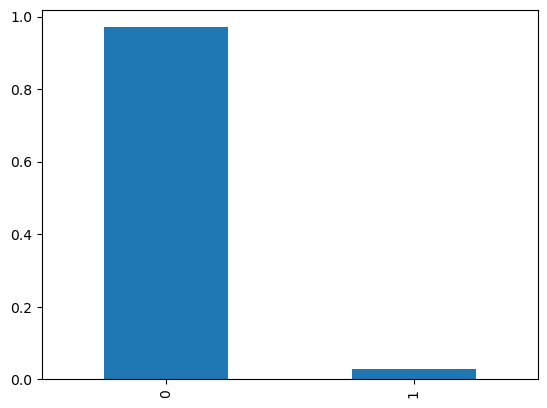

In [53]:
bar=round(a["churn"].value_counts(normalize = True),2).plot.bar()
bar
plt.show()

In [54]:
#The minutes of usage of the customer has decreased in the action phase than the good phase.

In [55]:
a['total_mou_good'] = (a['total_og_mou_6'] + a['total_ic_mou_6'])
a['avg_mou_action'] = (a['total_og_mou_7'] + a['total_og_mou_8'] + a['total_ic_mou_7'] + a['total_ic_mou_8'])/2
a['diff_mou'] = a['avg_mou_action'] - a['total_mou_good']
a['decrease_mou_action'] = np.where((a['diff_mou'] < 0), 1, 0)

In [56]:
a.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,511,0.00,2.45,21.89,459.0,0,711.67,597.705,-113.965,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,667,0.00,0.00,0.00,408.0,0,1341.41,1.560,-1339.850,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,720,0.00,0.00,0.00,640.0,0,1067.43,1245.130,177.700,0
38,7000815202,0.0,0.0,0.0,363.987,486.558,393.909,248.99,619.96,666.38,...,1155,0.00,0.00,0.00,528.0,0,408.65,776.155,367.505,0


In [57]:
#The number of recharge of the customer has decreased in the action phase than the good phase.

In [58]:
a['avg_rech_num_action'] = (a['total_rech_num_7'] + a['total_rech_num_8'])/2
a['diff_rech_num'] = a['avg_rech_num_action'] - a['total_rech_num_6']
a['decrease_rech_num_action'] = np.where((a['diff_rech_num'] < 0), 1, 0)
a.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,21.89,459.0,0,711.67,597.705,-113.965,1,4.0,-6.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,408.0,0,1341.41,1.560,-1339.850,1,3.0,-16.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,640.0,0,1067.43,1245.130,177.700,0,26.5,4.5,0
38,7000815202,0.0,0.0,0.0,363.987,486.558,393.909,248.99,619.96,666.38,...,0.00,528.0,0,408.65,776.155,367.505,0,14.0,-13.0,1


In [59]:
#The average revenue per customer has decreased in the action phase than the good phase.

In [60]:
a['avg_arpu_action'] = (a['arpu_7'] + a['arpu_8'])/2
a['diff_arpu'] = a['avg_arpu_action'] - a['arpu_6']
a['decrease_arpu_action'] = np.where(a['diff_arpu'] < 0, 1, 0)
a.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,612.22,324.125,-288.095,1,17.5,-1.5,1,314.7925,-63.9285,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,711.67,597.705,-113.965,1,4.0,-6.0,1,243.8815,-187.0935,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1341.41,1.560,-1339.850,1,3.0,-16.0,1,22.2395,-667.7685,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,1067.43,1245.130,177.700,0,26.5,4.5,0,617.7565,103.3035,0
38,7000815202,0.0,0.0,0.0,363.987,486.558,393.909,248.99,619.96,666.38,...,408.65,776.155,367.505,0,14.0,-13.0,1,440.2335,76.2465,0


In [61]:
#The amount of recharge of the customer has decreased in the action phase than the good phase.

In [62]:
a['avg_rech_amt_action'] = (a['total_rech_amt_7'] + a['total_rech_amt_8'])/2
a['diff_rech_amt'] = a['avg_rech_amt_action'] - a['total_rech_amt_6']
a['decrease_rech_amt_action'] = np.where((a['diff_rech_amt'] < 0), 1, 0)
a.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,17.5,-1.5,1,314.7925,-63.9285,1,360.5,-76.5,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,4.0,-6.0,1,243.8815,-187.0935,1,254.0,-316.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,3.0,-16.0,1,22.2395,-667.7685,1,15.0,-801.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,26.5,4.5,0,617.7565,103.3035,0,699.0,99.0,0
38,7000815202,0.0,0.0,0.0,363.987,486.558,393.909,248.99,619.96,666.38,...,0,14.0,-13.0,1,440.2335,76.2465,0,526.0,106.0,0


In [63]:
#The volume based cost of the customer has decreased in the action phase than the good phase.

In [64]:
a['avg_vbc_3g_action'] = (a['jul_vbc_3g'] + a['aug_vbc_3g'])/2
a['diff_vbc'] = a['avg_vbc_3g_action'] - a['jun_vbc_3g']
a['decrease_vbc_action'] = np.where(a['diff_vbc'] < 0 , 1, 0)
a.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,314.7925,-63.9285,1,360.5,-76.5,1,465.840,343.680,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,243.8815,-187.0935,1,254.0,-316.0,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,22.2395,-667.7685,1,15.0,-801.0,1,0.000,0.000,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,617.7565,103.3035,0,699.0,99.0,0,0.000,0.000,0
38,7000815202,0.0,0.0,0.0,363.987,486.558,393.909,248.99,619.96,666.38,...,1,440.2335,76.2465,0,526.0,106.0,0,0.000,0.000,0


EDA

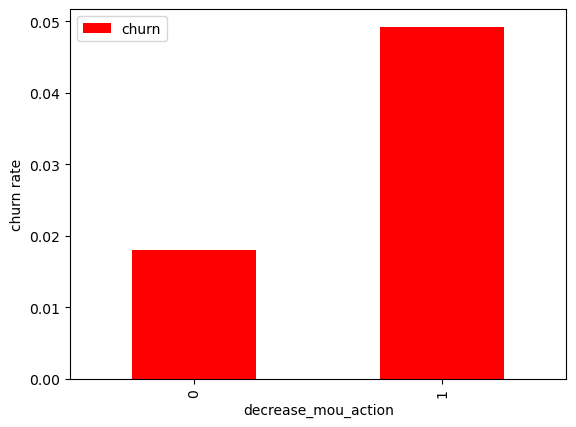

In [65]:
a.pivot_table(values='churn', index='decrease_mou_action').plot.bar(color='r')
plt.ylabel('churn rate')
plt.show()

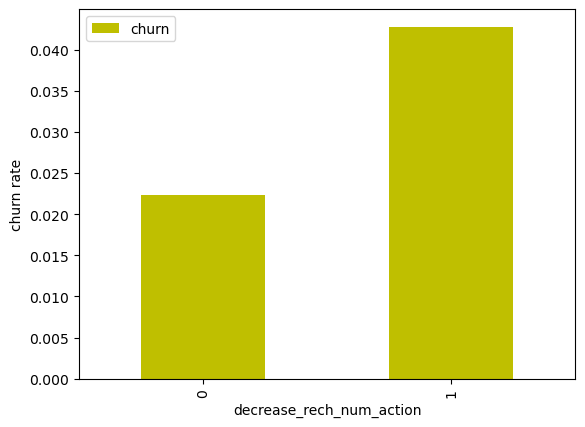

In [66]:
a.pivot_table(values='churn', index='decrease_rech_num_action').plot.bar(color='y')
plt.ylabel('churn rate')
plt.show()

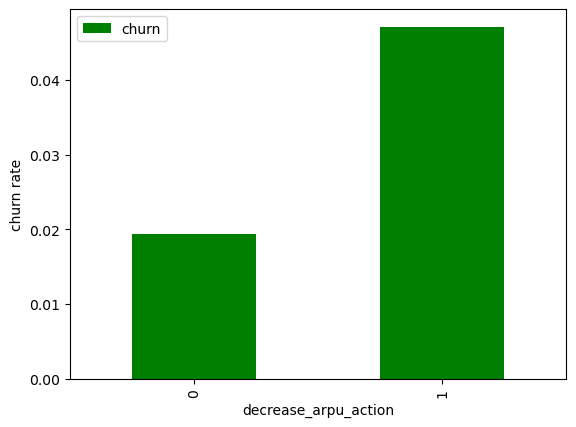

In [67]:
a.pivot_table(values='churn', index='decrease_arpu_action').plot.bar(color='g')
plt.ylabel('churn rate')
plt.show()

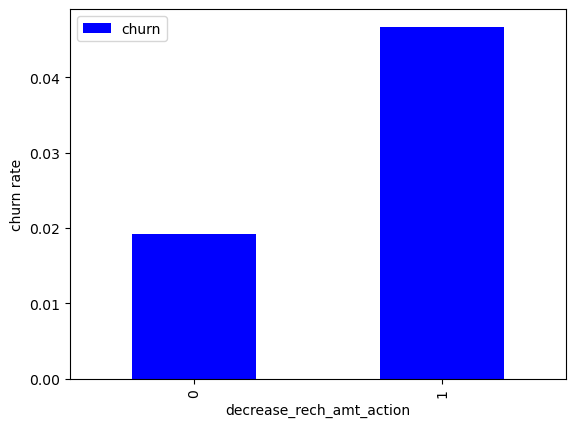

In [68]:
a.pivot_table(values='churn', index='decrease_rech_amt_action').plot.bar(color='b')
plt.ylabel('churn rate')
plt.show()

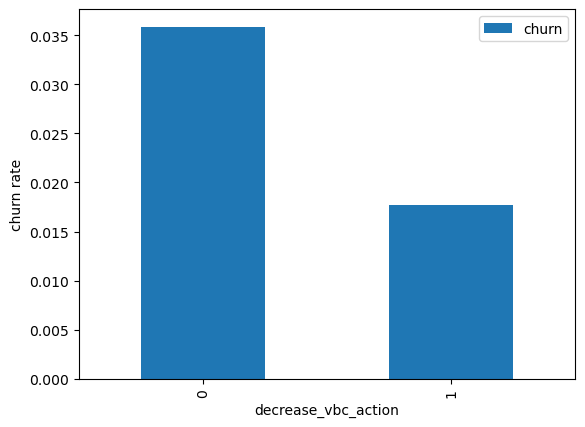

In [69]:
a.pivot_table(values='churn', index='decrease_vbc_action').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [70]:
# churn df
churn = a[a['churn'] == 1]
# not churn  df
non_churn = a[a['churn'] == 0]

[Text(0.5, 0, 'avg_arpu_action')]

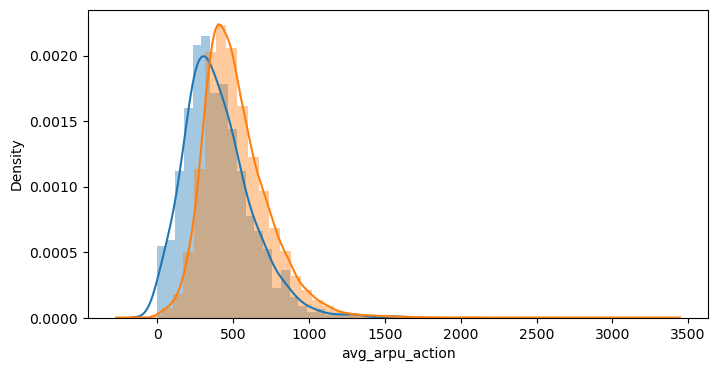

In [71]:
plt.figure(figsize=[8,4])
ax = sns.distplot(churn['avg_arpu_action'],label='churn')
ax = sns.distplot(non_churn['avg_arpu_action'],label='not churn')
ax.set(xlabel='avg_arpu_action')

[Text(0.5, 0, 'total_mou_good')]

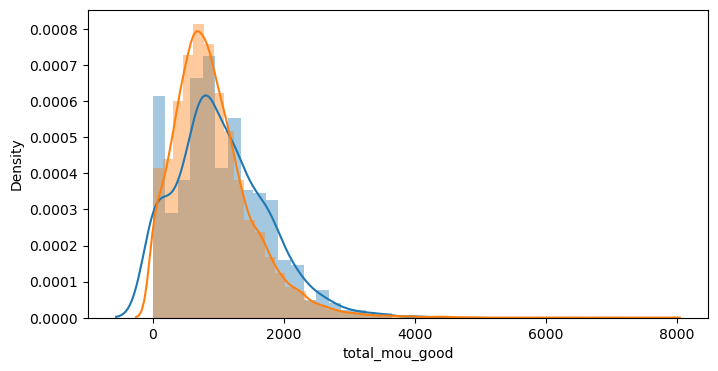

In [72]:
plt.figure(figsize=[8,4])
ax = sns.distplot(churn['total_mou_good'],label='churn')
ax = sns.distplot(non_churn['total_mou_good'],label='not churn')
ax.set(xlabel='total_mou_good')

In [73]:
#Recharge amount and number of recharge in action month

<AxesSubplot:xlabel='avg_rech_num_action', ylabel='avg_rech_amt_action'>

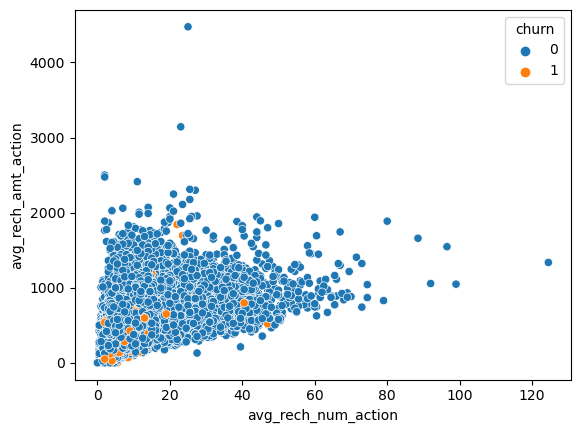

In [74]:
sns.scatterplot(data=a,y="avg_rech_amt_action",x="avg_rech_num_action",hue="churn")

In [75]:
#churn rate by the decreasing recharge amount and volume based cost in the action phase

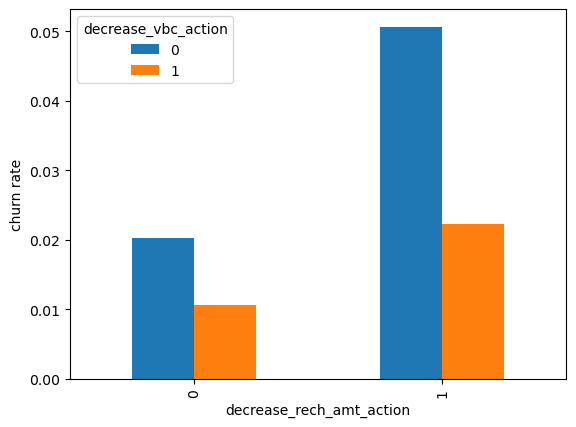

In [76]:
a.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [77]:
#churn rate by the decreasing recharge amount and number of recharge

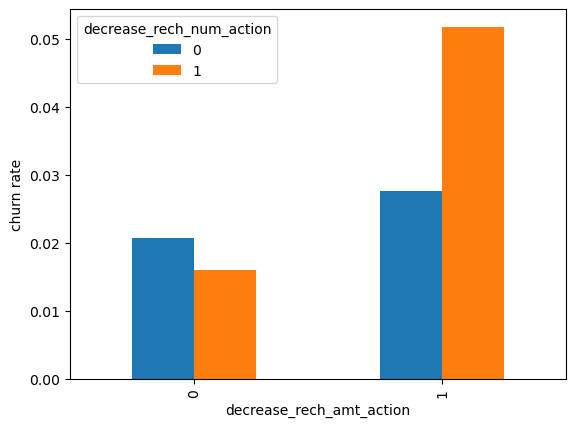

In [78]:
a.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [79]:
a = a.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7','mobile_number'], axis=1)

In [80]:
a.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,decrease_mou_action,decrease_rech_num_action,decrease_arpu_action,decrease_rech_amt_action,decrease_vbc_action
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,...,315,21.03,910.65,122.16,0,1,1,1,1,0
16,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,...,511,0.00,2.45,21.89,0,1,1,1,1,1
17,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,...,667,0.00,0.00,0.00,0,1,1,1,1,0
21,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,757.93,...,720,0.00,0.00,0.00,0,0,0,0,0,0
38,0.0,0.0,0.0,363.987,486.558,393.909,248.99,619.96,666.38,88.86,...,1155,0.00,0.00,0.00,0,0,1,0,0,0


TRAIN TEST SPLIT

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
y=a.pop("churn")
x=a

In [83]:
X_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [84]:
print(X_train.shape, x_test.shape)

(15635, 138) (6702, 138)


In [85]:
from sklearn.preprocessing import MinMaxScaler

numm = X_train.select_dtypes(include=['float64']).columns

scaler = MinMaxScaler()
X_train[numm] = scaler.fit_transform(X_train[numm])
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_arpu_action,decrease_rech_amt_action,decrease_vbc_action
59678,0.0,0.0,0.0,0.485724,0.361258,0.218279,0.018897,0.000016,0.009234,0.180313,...,0,1293,0.0,0.000000,0.000000,1,1,1,1,0
2143,0.0,0.0,0.0,0.338324,0.534718,0.167201,0.009128,0.006062,0.002314,0.237286,...,0,1360,0.0,0.000000,0.000000,0,0,0,0,0
74427,0.0,0.0,0.0,0.324649,0.412472,0.136266,0.082465,0.042391,0.048816,0.149393,...,0,367,0.0,0.000000,0.000000,0,1,1,1,0
58907,0.0,0.0,0.0,0.302435,0.356365,0.090031,0.025521,0.007325,0.015377,0.205086,...,0,907,0.0,0.043534,0.046681,1,1,1,1,1
74640,0.0,0.0,0.0,0.229472,0.414809,0.148669,0.002954,0.011013,0.008706,0.056864,...,0,1042,0.0,0.000000,0.000000,0,0,0,0,0


In [86]:
# Checking the break-up of y_train data before SMOTE:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 528
Before OverSampling, counts of label '0': 15107
Before OverSampling, churn event rate : 3.38% 



In [87]:
!pip install imblearn
!pip install SMOTE

In [88]:
# fitting SMOTE: 
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)


In [89]:
!pip install imbalanced-learn

In [90]:
y_train=y_train.astype("int")
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 15635 entries, 59678 to 24814
Series name: churn
Non-Null Count  Dtype
--------------  -----
15635 non-null  int32
dtypes: int32(1)
memory usage: 183.2 KB


In [91]:
x_train_sm,y_train_sm = smt.fit_resample(X_train,y_train)

In [92]:
# Checking the break-up of y_train data after SMOTE:

print('After OverSampling, the shape of train_X: {}'.format(x_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_sm==1)/len(y_train_sm)*100,2)))


After OverSampling, the shape of train_X: (30214, 138)
After OverSampling, the shape of train_y: (30214,) 

After OverSampling, counts of label '1': 15107
After OverSampling, counts of label '0': 15107
After OverSampling, churn event rate : 50.0% 



# Using SMOTE, we have synthetically oversampled the churn class and now both churn and non-churn class are equally distributed.

# Logistic Regression:

In [93]:
# importing the required libraries
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)        
rfe = rfe.fit(x_train_sm, y_train_sm)

In [94]:
list(zip(x_train_sm.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 124),
 ('std_og_t2o_mou', False, 123),
 ('loc_ic_t2o_mou', False, 122),
 ('arpu_6', False, 43),
 ('arpu_7', False, 45),
 ('arpu_8', False, 102),
 ('onnet_mou_6', False, 27),
 ('onnet_mou_7', False, 29),
 ('onnet_mou_8', False, 30),
 ('offnet_mou_6', False, 105),
 ('offnet_mou_7', False, 42),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 32),
 ('roam_ic_mou_7', False, 34),
 ('roam_ic_mou_8', False, 6),
 ('roam_og_mou_6', False, 40),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 51),
 ('loc_og_t2t_mou_7', False, 9),
 ('loc_og_t2t_mou_8', False, 24),
 ('loc_og_t2m_mou_6', False, 66),
 ('loc_og_t2m_mou_7', False, 4),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', False, 16),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 92),
 ('loc_og_t2c_mou_7', False, 114),
 ('loc_og_t2c_mou_8', False, 115),
 ('loc_og_mou_6', False, 57),
 ('loc_og_mou_7', False, 52),
 ('loc_og

In [95]:
col = x_train_sm.columns[rfe.support_]
col

Index(['offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_mou_7',
       'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'aug_vbc_3g'],
      dtype='object')

In [96]:
X_train_SM = sm.add_constant(x_train_sm[col])
logm1 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
model = logm1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                30214
Model:                            GLM   Df Residuals:                    30198
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11515.
Date:                Tue, 25 Apr 2023   Deviance:                       23030.
Time:                        22:39:35   Pearson chi2:                 3.40e+07
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4642
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6495      0.034     19.208      0.000       0.583       0.716
offnet_mou_8        -6.0378      1.082     -5.581      0.000      -8.158      -3.917
roam_og_mou_7        3.3180      0.376      8.818      0.000       2.580       4.055
roam_og_mou_8       15.0762      0.593     25.438      0.000      13.915      16.238
loc_og_t2m_mou_8   -25.4165      1.425    -17.833      0.000     -28.210     -22.623
loc_og_t2f_mou_6    -7.3575      1.740     -4.229      0.000     -10.767      -3.948
loc_og_t2f_mou_8    -8.9301      1.861     -4.800      0.000     -12.577      -5.283
loc_og_mou_8        96.2329      9.008     10.683      0.000      78.578     113.888
std_og_mou_7         5.7242      0.197     29.002      0.000       5.337       6.111
std_og_mou_8       186.2143     18.326     10.161      0.000     150.296     222.133
total_og_mou_8    -204.7162     18.332    -11.167      0.000    -240.647    -168.786
loc_ic_t2t_mou_8   -34.6570      3.147    -11.014      0.000     -40.824     -28.490
loc_ic_t2f_mou_8   -28.7305      2.967     -9.683      0.000     -34.546     -22.915
loc_ic_mou_8        -6.4988      1.665     -3.904      0.000      -9.761      -3.236
total_ic_mou_8      -3.7006      0.775     -4.777      0.000      -5.219      -2.182
aug_vbc_3g         -22.2578      1.232    -18.069      0.000     -24.672     -19.843
====================================================================================
"""

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SM[col].values, i) for i in range(X_train_SM[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
9,total_og_mou_8,1287.91
8,std_og_mou_8,825.83
6,loc_og_mou_8,247.67
12,loc_ic_mou_8,10.92
13,total_ic_mou_8,7.74


In [98]:
drop=["total_og_mou_8","std_og_mou_8","loc_ic_mou_8"]
col=col.drop(drop)


In [99]:
col

Index(['offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'aug_vbc_3g'],
      dtype='object')

In [101]:
X_train_SM = sm.add_constant(x_train_sm[col])
logm1 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
model = logm1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                30214
Model:                            GLM   Df Residuals:                    30201
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11862.
Date:                Tue, 25 Apr 2023   Deviance:                       23724.
Time:                        22:39:37   Pearson chi2:                 1.04e+08
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4518
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6964      0.033     21.416      0.000       0.633       0.760
offnet_mou_8       -18.3576      0.921    -19.929      0.000     -20.163     -16.552
roam_og_mou_7        3.0026      0.370      8.113      0.000       2.277       3.728
roam_og_mou_8       17.4526      0.598     29.195      0.000      16.281      18.624
loc_og_t2m_mou_8   -26.0151      1.383    -18.810      0.000     -28.726     -23.304
loc_og_t2f_mou_6    -5.7667      1.696     -3.400      0.001      -9.091      -2.442
loc_og_t2f_mou_8    -8.8369      1.881     -4.699      0.000     -12.523      -5.151
loc_og_mou_8        -3.8406      1.133     -3.390      0.001      -6.061      -1.620
std_og_mou_7         3.3538      0.149     22.452      0.000       3.061       3.647
loc_ic_t2t_mou_8   -48.7913      2.934    -16.631      0.000     -54.541     -43.041
loc_ic_t2f_mou_8   -33.2403      2.882    -11.533      0.000     -38.889     -27.591
total_ic_mou_8      -6.8981      0.740     -9.324      0.000      -8.348      -5.448
aug_vbc_3g         -22.9583      1.249    -18.386      0.000     -25.406     -20.511
====================================================================================
"""

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SM[col].values, i) for i in range(X_train_SM[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_og_t2m_mou_8,4.79
6,loc_og_mou_8,4.20
10,total_ic_mou_8,3.22
0,offnet_mou_8,2.59
5,loc_og_t2f_mou_8,2.32
4,loc_og_t2f_mou_6,2.18
2,roam_og_mou_8,2.09
8,loc_ic_t2t_mou_8,1.99
1,roam_og_mou_7,1.94
7,std_og_mou_7,1.66


- P-values for all features are within the prescribed threshold of 0.05 and VIF is also below  < 5.0 

# Train case analysis

In [103]:
y_train_sm_pred = model.predict(X_train_SM)
y_train_sm_pred=round(y_train_sm_pred[:],3)
round(y_train_sm_pred[:10],4)

0    0.002
1    0.004
2    0.006
3    0.627
4    0.000
5    0.397
6    0.136
7    0.053
8    0.738
9    0.369
dtype: float64

In [104]:
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.002, 0.004, 0.006, 0.627, 0.   , 0.397, 0.136, 0.053, 0.738,
       0.369])

In [105]:
y_train_sm_pred_final = pd.DataFrame({'Churn':y_train_sm.values, 'Churn_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Churn,Churn_prob
0,0,0.002
1,0,0.004
2,0,0.006
3,0,0.627
4,0,0.000


In [106]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_sm_pred_final.head()

,Churn,Churn_prob,churn_pred
0,0,0.002,0
1,0,0.004,0
2,0,0.006,0
3,0,0.627,1
4,0,0.000,0


In [107]:
y_train_sm_pred_final['Churn'].describe()

count    30214.000000
mean         0.500000
std          0.500008
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: Churn, dtype: float64

In [108]:
from sklearn import metrics

# Confusion matrix 
conf_matrix = metrics.confusion_matrix(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["churn_pred"] )
conf_matrix

array([[11791,  3316],
       [ 1412, 13695]], dtype=int64)

In [109]:
print( metrics.classification_report( y_train_sm_pred_final["Churn"], y_train_sm_pred_final["churn_pred"] ) )

              precision    recall  f1-score   support

           0       0.89      0.78      0.83     15107
           1       0.81      0.91      0.85     15107

    accuracy                           0.84     30214
   macro avg       0.85      0.84      0.84     30214
weighted avg       0.85      0.84      0.84     30214



# ROC 

In [110]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve',size=14, fontweight = 600)
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final["Churn"], 
                                          y_train_sm_pred_final["churn_pred"], 
                                         drop_intermediate = False )

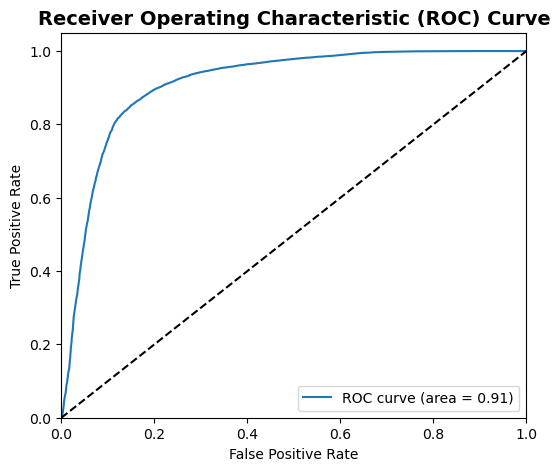

In [112]:
draw_roc(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["Churn_prob"])

# Finding optimal cut-off

In [113]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Churn,Churn_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.002,0,1,0,0,0,0,0,0,0,0,0
1,0,0.004,0,1,0,0,0,0,0,0,0,0,0
2,0,0.006,0,1,0,0,0,0,0,0,0,0,0
3,0,0.627,1,1,1,1,1,1,1,1,0,0,0
4,0,0.000,0,0,0,0,0,0,0,0,0,0,0


In [114]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.556596     1.000000     0.113193
0.1          0.1  0.733302     0.980274     0.486331
0.2          0.2  0.776296     0.965645     0.586946
0.3          0.3  0.805223     0.953730     0.656715
0.4          0.4  0.827927     0.936784     0.719071
0.5          0.5  0.843516     0.906533     0.780499
0.6          0.6  0.850533     0.858609     0.842457
0.7          0.7  0.826968     0.751969     0.901966
0.8          0.8  0.713874     0.476733     0.951016
0.9          0.9  0.585424     0.191236     0.979612


-From the above table we can conclude, the optimal probability cutoff point to predicted churn variable converges at 0.6

In [115]:
y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Churn_prob.map( lambda x: 1 if x > 0.6 else 0)

y_train_sm_pred_final.head()

,Churn,Churn_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_churn_pred
0,0,0.002,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.004,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.006,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.627,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
conf_matrix2 = metrics.confusion_matrix(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["final_churn_pred"])

In [117]:
def conf_matrix_plot(cm):
    plt.figure(figsize=(5,4))
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    ax.set_xlabel('Predicted Values',size=12)
    ax.set_ylabel('Actual Values',size=12)
    ax.set_title('Confusion Matrix', size=14,fontweight = 600)
    return plt.show()

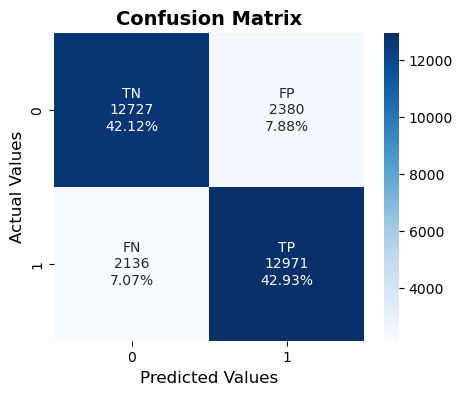

In [118]:
conf_matrix_plot(conf_matrix2)

In [119]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Churn_prob.map(lambda x: 1 if x > 0.6 else 0)
y_train_sm_pred_final.head()

,Churn,Churn_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_churn_pred
0,0,0.002,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.004,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.006,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.627,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0


In [120]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["churn_pred"] )
confusion2

array([[12727,  2380],
       [ 2136, 12971]], dtype=int64)

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8586085920434235

In [123]:
# Let us calculate specificity
TN / float(TN+FP)

0.8424571390746012

When we select the optimal cutoff = 0.6, the various performance parameters Accuracy, Sensitivity & Specificity are all ~80%.

# Precision and recall tradeoff

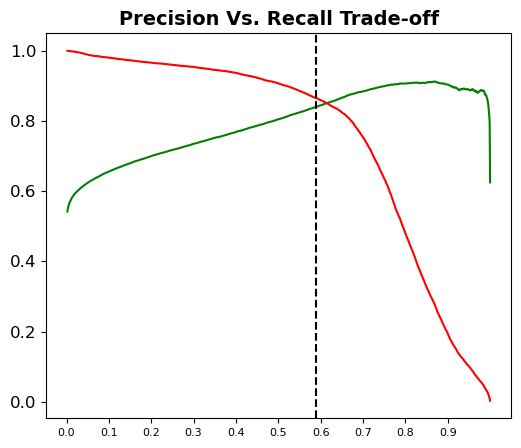

In [124]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["Churn_prob"])

# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(6,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.59, color='black', linestyle='--') # additing axline
plt.title('Precision Vs. Recall Trade-off', size=14, fontweight = 600)
plt.xticks(np.arange(0,1,step=0.1),size=8)
plt.yticks(size=12)

plt.show()

- Precision and Recall are inversely related means if one increases other will definetely decrease.
- Based on Precision- Recall Trade off curve, the cutoff point seems to 0.6. 

In [125]:
from sklearn.metrics import accuracy_score

In [126]:
y_train_sm_pred_final

,Churn,Churn_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_churn_pred
0,0,0.002,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.004,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.006,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.627,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30209,1,0.962,1,1,1,1,1,1,1,1,1,1,1,1
30210,1,0.039,0,1,0,0,0,0,0,0,0,0,0,0
30211,1,0.769,1,1,1,1,1,1,1,1,1,0,0,1
30212,1,0.421,0,1,1,1,1,1,0,0,0,0,0,0


In [127]:
accuracy_score(y_train_sm_pred_final["Churn"],y_train_sm_pred_final["churn_pred"])

0.8505328655590124

- accuracy score we are getting is 0.85

In [128]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15635 entries, 59678 to 24814
Columns: 138 entries, loc_og_t2o_mou to decrease_vbc_action
dtypes: float64(108), int32(5), int64(25)
memory usage: 16.3 MB


In [129]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6702 entries, 15477 to 79822
Columns: 138 entries, loc_og_t2o_mou to decrease_vbc_action
dtypes: float64(108), int32(5), int64(25)
memory usage: 7.0 MB


# Making predictions on the test set

In [130]:
x_test[numm] = scaler.transform(x_test[numm])
x_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_arpu_action,decrease_rech_amt_action,decrease_vbc_action
15477,0.0,0.0,0.0,0.334979,0.458594,0.072033,0.308290,0.162166,0.028389,0.048155,...,0,655,0.000000,0.000000,0.000000,1,1,1,1,0
90948,0.0,0.0,0.0,0.273292,0.522225,0.126308,0.148998,0.061743,0.038831,0.034269,...,0,773,0.000000,0.000000,0.000000,1,0,0,0,0
20981,0.0,0.0,0.0,0.343139,0.511850,0.158439,0.056543,0.048284,0.042400,0.125829,...,0,2959,0.000000,0.000000,0.000000,0,1,0,0,0
73270,0.0,0.0,0.0,0.315369,0.398785,0.116998,0.132493,0.113523,0.104820,0.145802,...,0,2891,0.000000,0.000000,0.000000,1,0,1,1,0
47700,0.0,0.0,0.0,0.335613,0.375133,0.142506,0.037519,0.015592,0.016477,0.055606,...,1,2048,0.015539,0.009746,0.000831,1,0,1,0,0


In [131]:
# filter the X_test to reflect features from our final model:
x_test_final=x_test[col]
x_test_final.head()

,offnet_mou_8,roam_og_mou_7,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_mou_8,std_og_mou_7,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,total_ic_mou_8,aug_vbc_3g
15477,0.004056,0.000000,0.000000,0.010297,0.005404,0.000000,0.005919,0.280312,0.006083,0.004816,0.035624,0.000000
90948,0.010818,0.000000,0.000000,0.011265,0.000160,0.000000,0.006623,0.123816,0.008973,0.008790,0.034770,0.000000
20981,0.030361,0.130187,0.000000,0.122091,0.000520,0.006528,0.099908,0.014629,0.051036,0.002336,0.118946,0.000000
73270,0.011554,0.000000,0.031896,0.030661,0.009427,0.002123,0.117008,0.001402,0.048173,0.005090,0.067892,0.000000
47700,0.014158,0.000000,0.000000,0.036092,0.015271,0.020114,0.035651,0.013876,0.009784,0.000582,0.046067,0.015539


In [145]:
x_test_final.shape

(6702, 12)

In [133]:
# Add constant to the test model.
x_test_SM = sm.add_constant(x_test_final)
x_test_SM.columns

Index(['const', 'offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_8',
       'loc_og_mou_8', 'std_og_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8',
       'total_ic_mou_8', 'aug_vbc_3g'],
      dtype='object')

# Making predictions on the test set

In [134]:
# Predicted values on the test set
y_test_pred = model.predict(x_test_SM).round()
y_test_pred.head()

15477    1.0
90948    0.0
20981    0.0
73270    0.0
47700    0.0
dtype: float64

In [135]:
# Convert y_pred to a dataframe which is an array

y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
15477,1.0
90948,0.0
20981,0.0
73270,0.0
47700,0.0


In [136]:
# Convert y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
15477,0
90948,0
20981,0
73270,0
47700,0


In [137]:
# rename the column
y_pred = y_pred.rename(columns = {0:"churn_prob"})
y_pred.head()

,churn_prob
15477,1.0
90948,0.0
20981,0.0
73270,0.0
47700,0.0


In [138]:
# Append y_test_df and y_pred

y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,churn_prob
15477,0,1.0
90948,0,0.0
20981,0,0.0
73270,0,0.0
47700,0,0.0


# Evaluating the Final model on Test data with the cut-off of 0.6:

In [139]:
#Create new column 'Final_Predicted' with value 1 if Churn_Prob > cutoff:

y_pred_final['test_churn_pred'] = y_pred_final.churn_prob.map(lambda x: 1 if x>0.6 else 0)
y_pred_final.head()

,churn,churn_prob,test_churn_pred
15477,0,1.0,1
90948,0,0.0,0
20981,0,0.0,0
73270,0,0.0,0
47700,0,0.0,0


In [147]:
y_pred_final["test_churn_pred"]

15477    1
90948    0
20981    0
73270    0
47700    0
        ..
80598    0
38172    0
7502     1
10414    0
79822    0
Name: test_churn_pred, Length: 6702, dtype: int64

In [148]:
y_pred_final["churn"]

15477    0
90948    0
20981    0
73270    0
47700    0
        ..
80598    0
38172    0
7502     0
10414    0
79822    0
Name: churn, Length: 6702, dtype: Int64

In [141]:
y_pred_final["churn"]=y_pred_final["churn"].convert_dtypes("int")

In [142]:
y_pred_final["churn"].info()

<class 'pandas.core.series.Series'>
Int64Index: 6702 entries, 15477 to 79822
Series name: churn
Non-Null Count  Dtype
--------------  -----
6702 non-null   Int64
dtypes: Int64(1)
memory usage: 111.3 KB


In [143]:
y_pred_final["test_churn_pred"].info()

<class 'pandas.core.series.Series'>
Int64Index: 6702 entries, 15477 to 79822
Series name: test_churn_pred
Non-Null Count  Dtype
--------------  -----
6702 non-null   int64
dtypes: int64(1)
memory usage: 104.7 KB


# accuracy_score(y_pred_final["churn"],y_pred_final["test_churn_pred"])

# Decision Trees:

In [152]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [153]:
decision_model = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=100).fit(x_train_sm, y_train_sm)

In [ ]:
!pip install six
!pip install pydotplus
!pip install graphviz

In [154]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [ ]:
conda install graphviz

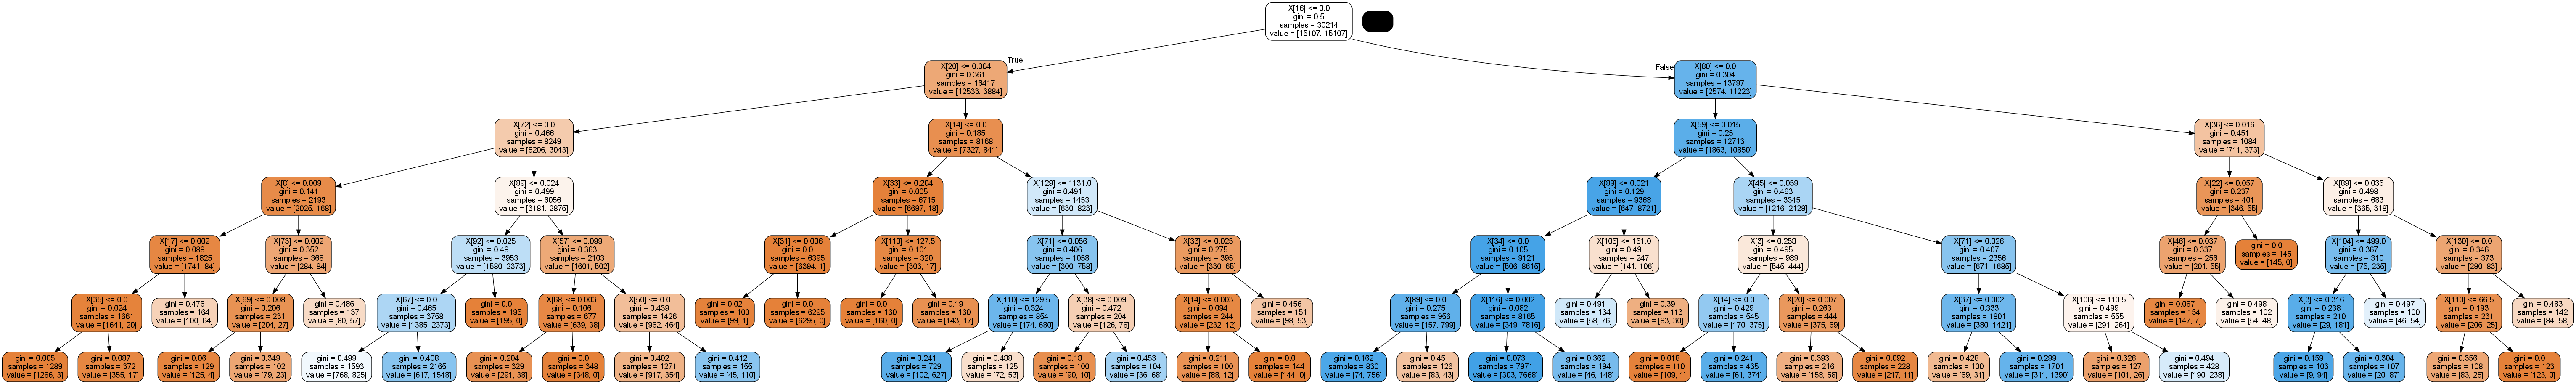

In [155]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(decision_model, out_file=dot_data, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

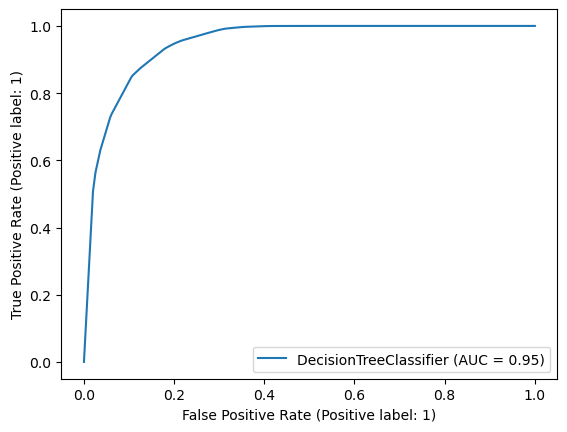

In [165]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(decision_model, x_train_sm, y_train_sm, drop_intermediate=False)
plt.show()

In [157]:
# predict on the test set: 

y_test_pred = decision_model.predict(x_test)

In [158]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

print("Accuracy: ", round(accuracy_score(y_test, y_test_pred),3))

# Random Forest:

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=42, oob_score=True)

In [166]:
rf_base = rf.fit(x_train_sm, y_train_sm)

In [167]:
rf.oob_score_

0.907890381942146

- The model is predicting ~90% rows correctly from the out-of-bag sample.

In [170]:
#predict using the rf_base model: 

y_test_pred = rf_base.predict(x_test)

("Accuracy: ", round(accuracy_score(y_test, y_test_pred),3))

*Models approach:**  
To predict behavior we created three models:

1) Logistic Regression Model  
2) Decision Tree Classifier  
3) Random Forest Classifier  